In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [5]:
breastcancerdata = pd.read_csv("C:\\Users\\pranitha\\Desktop\\ASSIGNMENTS\\task 7\\breast-cancer.csv")

In [6]:
breastcancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Check unique values in 'diagnosis'
print(breastcancerdata['diagnosis'].unique())  # Should print something like ['M' 'B']

['M' 'B']


In [8]:
# Apply LabelEncoder
le = LabelEncoder()
breastcancerdata['diagnosis'] = le.fit_transform(breastcancerdata['diagnosis'])

In [9]:

# Check encoded values
print(breastcancerdata['diagnosis'].unique())  # Should print [1 0] or [0 1]

[1 0]


In [11]:
# split the features and target variables
X = breastcancerdata.drop('diagnosis', axis = 1)
Y = breastcancerdata['diagnosis']

In [12]:
# split the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [14]:
# Data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#  Train SVM (Linear and RBF Kernel)

In [16]:
# Linear Kernel SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, Y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, Y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# Evaluate Accuracy

In [19]:
from sklearn.metrics import accuracy_score

Y_pred_linear = svm_linear.predict(X_test_scaled)
Y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Linear Kernel Accuracy:", accuracy_score(Y_test, Y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(Y_test, Y_pred_rbf))


Linear Kernel Accuracy: 0.9766081871345029
RBF Kernel Accuracy: 0.9766081871345029


In [ ]:
# Hyperparameter Tuning (C, gamma)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9697784810126582


In [ ]:
#  Cross-validation Accuracy


In [22]:
from sklearn.model_selection import cross_val_score

best_svm = grid.best_estimator_
scores = cross_val_score(best_svm, X_train_scaled, Y_train, cv=5)
print("Cross-validation Mean Accuracy:", scores.mean())


Cross-validation Mean Accuracy: 0.9697784810126582


In [ ]:
# PCA + 2D Visualization

In [23]:
from sklearn.decomposition import PCA


# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)


In [25]:
# Retrain on reduced data
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_reduced, Y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


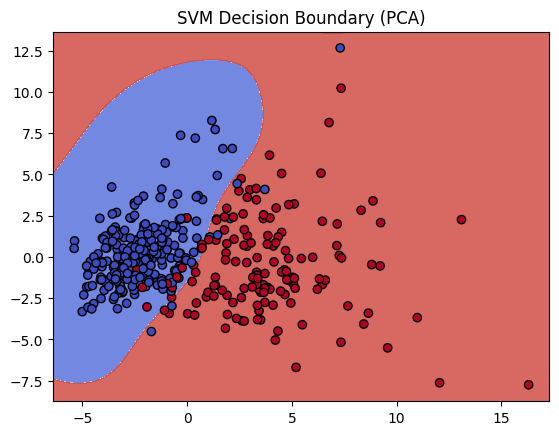

In [28]:
# Plot decision boundary
def plot_boundary(clf, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM Decision Boundary (PCA)")
    plt.show()

plot_boundary(svm_vis, X_reduced, Y_train)
